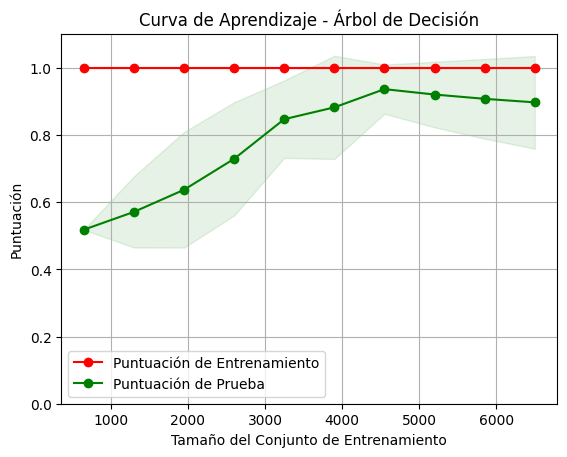

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Cargar dataset
X = pd.read_csv('mushroom_preprocessed.csv')
y = pd.read_csv('mushroom_targets.csv').squeeze()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

pd.DataFrame(y_pred, columns=['Predicciones']).to_csv('predicciones_modelo_2.csv', index=False)

#Curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

#Calcular estadisticas
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_std = test_scores.std(axis=1)

#Grafica
plt.figure()
plt.title("Curva de Aprendizaje - Árbol de Decisión")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Puntuación")
plt.ylim(0, 1.1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Puntuación de Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Puntuación de Prueba")
plt.legend(loc="best")
plt.show()
